#  YAPAY ZEKA SİSTEMLERİ DERSİ PROJE ÖDEVİ

**Adınız:** Halil
**Soyadınız:** Yaşar
**Okul Numaranız:** 2212721026
**Senaryo:** 6 (Kargo Kutusu Tasarımı)
**GitHub Repo Bağlantısı:** (https://github.com/halilyasar1/yapayzekaproje1)

Genetik Algoritma Çalışıyor...

OPTİMİZASYON TAMAMLANDI
En İyi Genişlik (x1): 40.00 cm
En İyi Yükseklik (x2): 20.00 cm
Maksimum Kazanç (y):  600.00


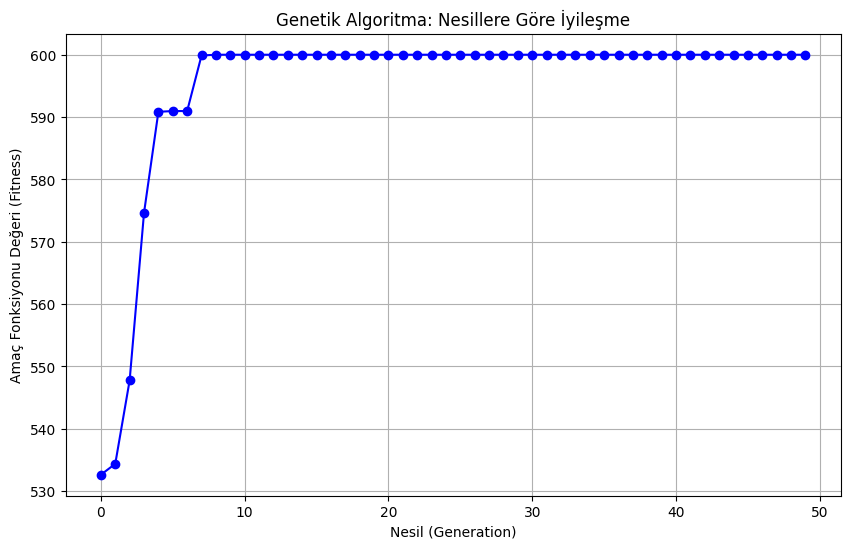

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# --- 1. AYARLAR VE TANIMLAMALAR ---
# Amaç Fonksiyonu (Senaryo 6)
# y = x1*x2 - 0.1*x1^2 - 0.1*x2^2
def fitness_function(x1, x2):
    return (x1 * x2) - (0.1 * x1**2) - (0.1 * x2**2)

# Genetik Algoritma Parametreleri
POPULATION_SIZE = 20    # Popülasyon büyüklüğü
GENERATIONS = 50        # Kaç tur dönecek
MUTATION_RATE = 0.1     # Mutasyon şansı

# Sınırlar (Senaryoda verilenler)
X1_BOUNDS = [10, 40]    # Genişlik
X2_BOUNDS = [5, 20]     # Yükseklik

# --- 2. YARDIMCI FONKSİYONLAR ---
def create_individual():
    """Rastgele genlere sahip birey oluşturur"""
    x1 = random.uniform(X1_BOUNDS[0], X1_BOUNDS[1])
    x2 = random.uniform(X2_BOUNDS[0], X2_BOUNDS[1])
    return [x1, x2]

def create_population(size):
    return [create_individual() for _ in range(size)]

def crossover(parent1, parent2):
    """İki ebeveynden yeni çocuk üretir"""
    # Basit bir çaprazlama: Bir özellik anneden, biri babadan
    child = [parent1[0], parent2[1]]
    return child

def mutate(individual):
    """Mutasyon işlemi"""
    if random.random() < MUTATION_RATE:
        individual[0] += random.uniform(-1, 1)
        # Sınır dışına çıkarsa düzelt (Clamping)
        individual[0] = max(X1_BOUNDS[0], min(individual[0], X1_BOUNDS[1]))

    if random.random() < MUTATION_RATE:
        individual[1] += random.uniform(-1, 1)
        individual[1] = max(X2_BOUNDS[0], min(individual[1], X2_BOUNDS[1]))
    return individual

# --- 3. ANA DÖNGÜ (EVRİM SÜRECİ) ---
population = create_population(POPULATION_SIZE)
best_fitness_history = []
best_solution = None
max_fitness = -99999

print("Genetik Algoritma Çalışıyor...")

for generation in range(GENERATIONS):
    # Her bireyin puanını hesapla
    scores = []
    for ind in population:
        score = fitness_function(ind[0], ind[1])
        scores.append((score, ind))

    # Sıralama yap (En yüksek puan en üstte)
    scores.sort(key=lambda x: x[0], reverse=True)

    # En iyiyi kaydet
    current_best_score = scores[0][0]
    best_fitness_history.append(current_best_score)

    if current_best_score > max_fitness:
        max_fitness = current_best_score
        best_solution = scores[0][1]

    # Seçim (En iyi %50 ebeveyn olur)
    top_half = scores[:POPULATION_SIZE // 2]
    parents = [x[1] for x in top_half]

    # Yeni nesil oluştur
    new_population = []
    new_population.extend(parents[:2]) # En iyi 2 taneyi aynen aktar (Elitizm)

    while len(new_population) < POPULATION_SIZE:
        p1 = random.choice(parents)
        p2 = random.choice(parents)
        child = crossover(p1, p2)
        child = mutate(child)
        new_population.append(child)

    population = new_population

# --- 4. SONUÇLARI YAZDIRMA ---
print("\n" + "="*30)
print("OPTİMİZASYON TAMAMLANDI")
print("="*30)
print(f"En İyi Genişlik (x1): {best_solution[0]:.2f} cm")
print(f"En İyi Yükseklik (x2): {best_solution[1]:.2f} cm")
print(f"Maksimum Kazanç (y):  {max_fitness:.2f}")

# --- 5. GRAFİK ÇİZME ---
plt.figure(figsize=(10, 6))
plt.plot(best_fitness_history, marker='o', linestyle='-', color='b')
plt.title('Genetik Algoritma: Nesillere Göre İyileşme')
plt.xlabel('Nesil (Generation)')
plt.ylabel('Amaç Fonksiyonu Değeri (Fitness)')
plt.grid(True)
plt.show()